In [ ]:
# Air Passengers
# 1949년 ~ 1960년 매달 비행기 탑승객 수에 대한 시계열 데이터
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'../input/ysp-koreauniv-tutorial/AirPassengers.csv',index_col=0)

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df

In [ ]:
df.plot()
plt.show()

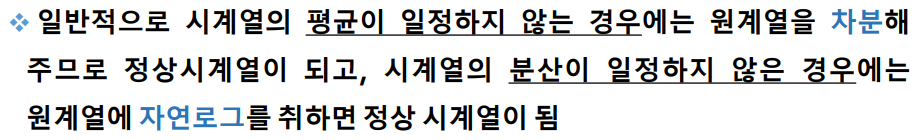

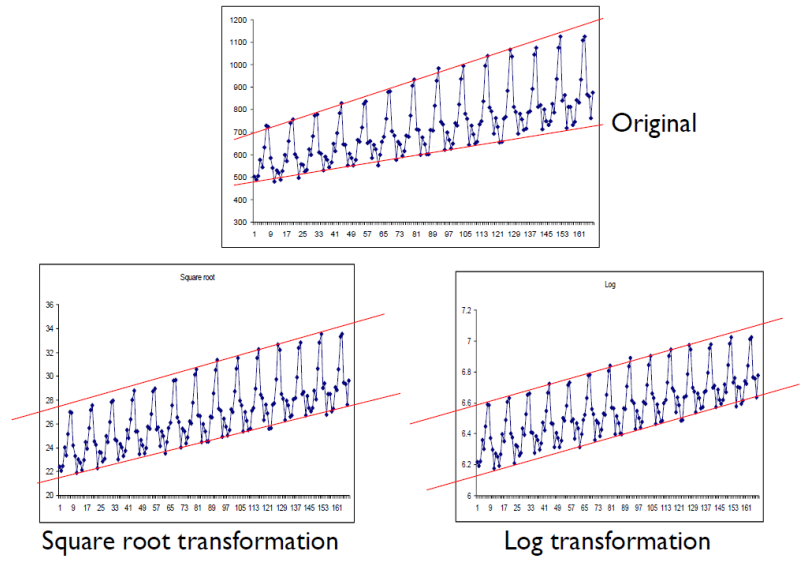

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative',period=12)
plt.rcParams['figure.figsize'] = [12, 8]
result.plot(observed=True, seasonal=True, trend=True, resid=True)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=12)
plt.rcParams['figure.figsize'] = [12, 8]
result.plot(observed=True, seasonal=True, trend=True, resid=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.2, shuffle = False)

In [ ]:
train_data

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), ax=ax[1])
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [ ]:
print('Examples of parameter combinations for original ARIMA...')
p=range(0,3) # p, d, q 모두 더 넓은 범위 탐색시 성능 향상 가능
d=range(0,2)
q=range(0,3)
pdq = list(itertools.product(p,d,q))
aics=[]
for i in pdq:
    model=ARIMA(train_data.values,order=(i)) # freq = train_data.index.inferred_freq # order에다가 qdq를 한번에 입력
    fitted_model = model.fit()
    print('ARIMA: ',i,'>> AIC : ',round(fitted_model.aic,2))
    aics.append(fitted_model.aic)

In [ ]:
best_pdq = pdq[np.argmin(aics)]
best_pdq

In [ ]:
model = ARIMA(train_data, order = best_pdq, freq = 'MS')
fitted_model = model.fit()

In [ ]:
prediction = fitted_model.get_forecast(steps = len(test_data))
prediction # forecast만 했을 때 값이 반환 안됨

In [ ]:
prediction.predicted_mean # 예측 평균값 반환

In [ ]:
prediction.conf_int() # 예측 interval 값 반환 (최소값, 최댓값)

In [ ]:
from sklearn.metrics import r2_score
prediction = fitted_model.get_forecast(steps = len(test_data))
predicted_value = prediction.predicted_mean # 예측 평균값 저장
predicted_ub = prediction.conf_int().iloc[:,1] # 최댓값 저장
predicted_lb = prediction.conf_int().iloc[:,0] # 최솟값 저장
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)
r2

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
# df.plot(ax=ax);
ax.plot(df.index, df) # 원본 데이터 plotting
ax.vlines(pd.to_datetime('1958-08-01'), 100, 650, linestyle='--', color='r', label = 'Start of Forecast') # train test 경계 표시
ax.plot(predict_index, predicted_value, label = 'Prediction') # 예측값 plotting
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.show()

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.base.prediction.PredictionResults.html

In [ ]:
print('Examples of parameter combinations for original ARIMA...')
p=range(0,3)#3
d=range(0,2)#2
q=range(0,3)#3
seasonal = 12
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],seasonal) for x in list(itertools.product(p,d,q))] # 18
aics=[]
for i in pdq:
    for j in seasonal_pdq:
        try:
            model=ARIMA(train_data.values,order=(i),seasonal_order=(j)) # freq = train_data.index.inferred_freq
            fitted_model = model.fit()
            print('SARIMA: ',i,j,'>> AIC : ',round(fitted_model.aic,2))
            aics.append(fitted_model.aic)
        except:
            aics.append(2000)
            continue

np.argmin(aics)

k=0
for i in pdq:
    for j in seasonal_pdq:
        if k == np.argmin(aics):
            best_pdq = i
            best_seasonal_pdq = j
            break
        k+=1
    if k == np.argmin(aics):
        break

print(best_pdq, best_seasonal_pdq)

model = ARIMA(train_data.values, order = best_pdq,seasonal_order=best_seasonal_pdq)
fitted_model = model.fit()

prediction = fitted_model.get_forecast(steps = len(test_data))
prediction

prediction.predicted_mean

prediction.conf_int()

from sklearn.metrics import r2_score
prediction = fitted_model.get_forecast(steps = len(test_data))
predicted_value = prediction.predicted_mean
predicted_ub = prediction.conf_int()[:,0]
predicted_lb = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)
r2

fig, ax = plt.subplots(figsize=(18,6))
# df.plot(ax=ax);
ax.plot(df.index, df)
ax.vlines(pd.to_datetime('1958-08-01'), 100, 650, linestyle='--', color='r', label = 'Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.show()

In [ ]:
# aic가 최저가 되는 best pdq, best seasonal pdq 탐색
k=0
for i in pdq:
    for j in seasonal_pdq:
        if k == np.argmin(aics):
            best_pdq = i
            best_seasonal_pdq = j
            break
        k+=1
    if k == np.argmin(aics):
        break

print(best_pdq, best_seasonal_pdq)

In [ ]:
model = ARIMA(train_data.values, order = best_pdq,seasonal_order=best_seasonal_pdq)
fitted_model = model.fit()

prediction = fitted_model.get_forecast(steps = len(test_data))
prediction

In [ ]:
prediction.predicted_mean

prediction.conf_int()

from sklearn.metrics import r2_score
prediction = fitted_model.get_forecast(steps = len(test_data))
predicted_value = prediction.predicted_mean
predicted_lb = prediction.conf_int()[:,0]
predicted_ub = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)
r2

In [ ]:


fig, ax = plt.subplots(figsize=(18,6))
# df.plot(ax=ax);
ax.plot(df.index, df)
ax.vlines(pd.to_datetime('1958-08-01'), 100, 650, linestyle='--', color='r', label = 'Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.show()

In [ ]:
np.argmin(aics)

In [ ]:
k=0
for i in pdq:
    for j in seasonal_pdq:
        if k == np.argmin(aics):
            best_pdq = i
            best_seasonal_pdq = j
            break
        k+=1
    if k == np.argmin(aics):
        break

In [ ]:
print(best_pdq, best_seasonal_pdq)

In [ ]:
model = ARIMA(train_data.values, order = best_pdq,seasonal_order=best_seasonal_pdq)
fitted_model = model.fit()

In [ ]:
prediction = fitted_model.get_forecast(steps = len(test_data))
prediction

In [ ]:
prediction.predicted_mean

In [ ]:
prediction.conf_int()

In [ ]:
from sklearn.metrics import r2_score
prediction = fitted_model.get_forecast(steps = len(test_data))
predicted_value = prediction.predicted_mean
predicted_ub = prediction.conf_int()[:,0]
predicted_lb = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)
r2

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
# df.plot(ax=ax);
ax.plot(df.index, df)
ax.vlines(pd.to_datetime('1958-08-01'), 100, 650, linestyle='--', color='r', label = 'Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.show()

## 로그변환

In [ ]:
df

In [ ]:
log_data = np.log(df)
log_data

In [ ]:
log_data.plot()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(log_data, model='multiplicative',period=12)
plt.rcParams['figure.figsize'] = [12, 8]
result.plot(observed=True, seasonal=True, trend=True, resid=True)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(log_data, model='additive',period=12)
plt.rcParams['figure.figsize'] = [12, 8]
result.plot(observed=True, seasonal=True, trend=True, resid=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(log_data, test_size = 0.2, shuffle = False)

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), ax=ax[1])
plt.show()

In [ ]:
df

In [ ]:
print('Examples of parameter combinations for original ARIMA...')
p=range(0,3)
d=range(0,2)
q=range(0,3)
seasonal = 12
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],seasonal) for x in list(itertools.product(p,d,q))]
aics=[]
for i in pdq:
    for j in seasonal_pdq:
        try:
            model=ARIMA(train_data.values,order=(i),seasonal_order=(j)) # freq = train_data.index.inferred_freq
            fitted_model = model.fit()
            print('SARIMA: ',i,j,'>> AIC : ',round(fitted_model.aic,2))
            aics.append(fitted_model.aic)
        except:
            aics.append(2000)
            continue

In [ ]:
np.argmin(aics)

In [ ]:
k=0
for i in pdq:
    for j in seasonal_pdq:
        if k == np.argmin(aics):
            best_pdq = i
            best_seasonal_pdq = j
            break
        k+=1
    if k == np.argmin(aics):
        break

In [ ]:
print(best_pdq, best_seasonal_pdq)

In [ ]:
model = ARIMA(train_data.values, order = best_pdq, seasonal_order=best_seasonal_pdq)
fitted_model = model.fit()

In [ ]:
prediction = fitted_model.get_forecast(steps = len(test_data))
prediction

In [ ]:
prediction.predicted_mean

In [ ]:
prediction.conf_int()

In [ ]:
predicted_value = prediction.predicted_mean
predicted_value

In [ ]:
from sklearn.metrics import r2_score
prediction = fitted_model.get_forecast(steps = len(test_data))
predicted_value = prediction.predicted_mean
predicted_value = np.exp(predicted_value)

predicted_ub = prediction.conf_int()[:,0]
predicted_ub = np.exp(predicted_ub)

predicted_lb = prediction.conf_int()[:,1]
predicted_lb = np.exp(predicted_lb)

predict_index = list(test_data.index)
r2 = r2_score(np.exp(test_data), predicted_value)
r2

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
# df.plot(ax=ax);
ax.plot(df.index, df)
ax.vlines(pd.to_datetime('1958-08-01'), 100, 650, linestyle='--', color='r', label = 'Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.show()